# TSFM Client - Simple Demo

This notebook demonstrates the simplest way to use the TSFM (Time Series Foundation Model) client for forecasting.

## Prerequisites

1. **API Key**: You need to set the `TSFM_API_KEY` environment variable
2. **Server**: Make sure the TSFM server is running on `http://localhost:8000`

### Setting up the API Key

```bash
export TSFM_API_KEY=""
```

Or in Python:
```python
import os
os.environ['TSFM_API_KEY'] = ''
```

In [1]:
# Set up API key (do this once per notebook session)
import os
# os.environ['TSFM_API_KEY'] = ''

# Install the package if needed
# !pip install tsfm-client

# Import required libraries
import pandas as pd
import numpy as np
from tsfm_client import predict

print("✅ Setup complete!")

✅ Setup complete!


In [2]:
# Create sample sales data
dates = pd.date_range('2024-01-01', periods=50, freq='D')

# Simulate sales data with trend and noise
trend = np.linspace(100, 200, 50)
noise = np.random.normal(0, 10, 50)
seasonal = 10 * np.sin(2 * np.pi * np.arange(50) / 7)  # Weekly seasonality

sales_data = pd.Series(trend + seasonal + noise, index=dates, name='sales')

print("Sample sales data (last 10 days):")
print(sales_data.tail(10))

Sample sales data (last 10 days):
2024-02-10    179.844065
2024-02-11    178.602119
2024-02-12    182.499725
2024-02-13    201.789392
2024-02-14    181.105266
2024-02-15    189.006382
2024-02-16    177.941017
2024-02-17    179.432188
2024-02-18    200.194624
2024-02-19    199.461433
Freq: D, Name: sales, dtype: float64


In [3]:
# Make prediction with confidence intervals
response = predict(
    data=sales_data,
    forecast_horizon=10,
    confidence_intervals=True
)

print(f"✅ 10-day forecast: {response.forecast}")
print(f"Model used: {response.model_name}")

if response.confidence_intervals:
    print(f"\nConfidence intervals: {response.confidence_intervals}")

✅ 10-day forecast: [193.98483276367188, 194.42367553710938, 192.22927856445312, 195.63063049316406, 192.1195526123047, 190.03492736816406, 199.6902313232422, 194.7528839111328, 189.7057647705078, 192.8876190185547]
Model used: chronos-t5-small

Confidence intervals: {'80%': {'lower': [182.79344177246094, 183.67111206054688, 175.2227020263672, 178.62400817871094, 179.94064331054688, 176.2102508544922, 189.37655639648438, 175.2227020263672, 166.44517517089844, 168.6395721435547], 'upper': [203.09153747558594, 203.2012481689453, 213.514892578125, 216.25790405273438, 209.5650634765625, 205.28598022460938, 215.38014221191406, 205.5054168701172, 211.54000854492188, 218.56202697753906]}}


In [4]:
# Convert to DataFrame for easier analysis
forecast_df = response.to_pandas()
print("Forecast DataFrame:")
print(forecast_df)

Forecast DataFrame:
     forecast   lower_80%   upper_80%
0  193.984833  182.793442  203.091537
1  194.423676  183.671112  203.201248
2  192.229279  175.222702  213.514893
3  195.630630  178.624008  216.257904
4  192.119553  179.940643  209.565063
5  190.034927  176.210251  205.285980
6  199.690231  189.376556  215.380142
7  194.752884  175.222702  205.505417
8  189.705765  166.445175  211.540009
9  192.887619  168.639572  218.562027


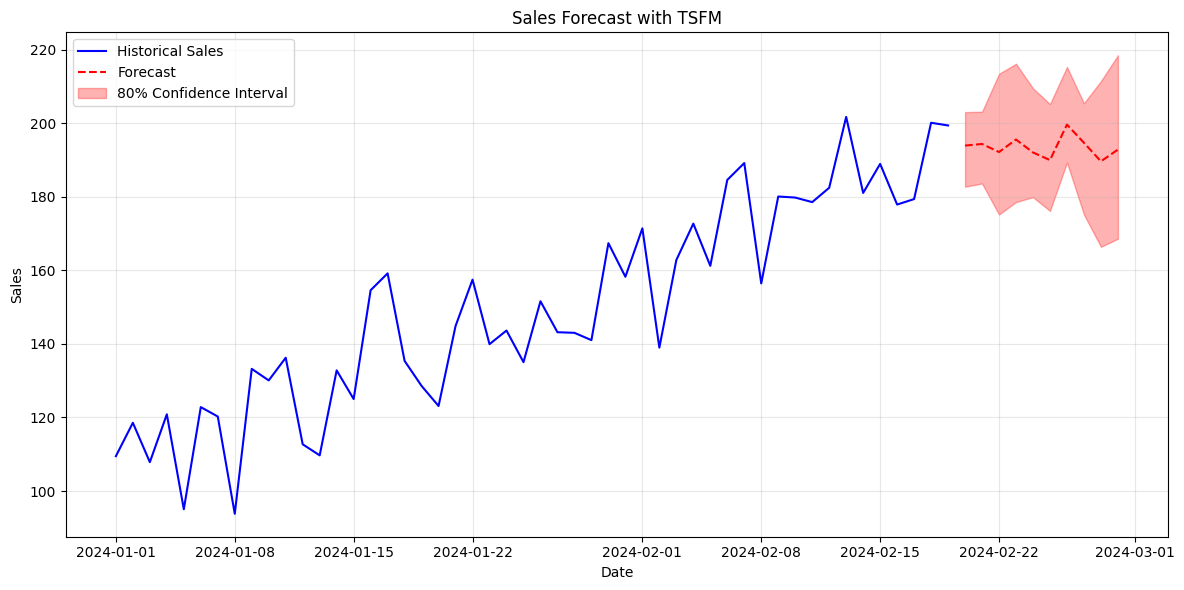

In [5]:
# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(sales_data.index, sales_data.values, label='Historical Sales', color='blue')

# Plot forecast
forecast_dates = pd.date_range(sales_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')
plt.plot(forecast_dates, response.forecast, label='Forecast', color='red', linestyle='--')

# Plot confidence intervals if available
if response.confidence_intervals:
    ci_80 = response.confidence_intervals['80%']
    plt.fill_between(forecast_dates, ci_80['lower'], ci_80['upper'], 
                    alpha=0.3, color='red', label='80% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with TSFM')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()